<a href="https://colab.research.google.com/github/Mohan311094/Assignments/blob/main/Assignment_04_Simple_Linear_Regression_1(R1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [21]:
dataset=pd.read_csv("/content/delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA and Data Visualization


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-23-ea2f6099b8bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

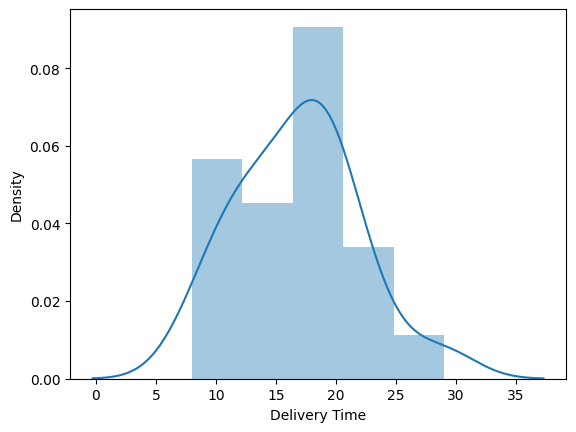

In [23]:
sns.distplot(dataset['Delivery Time'])


<ipython-input-24-87e4431da1bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

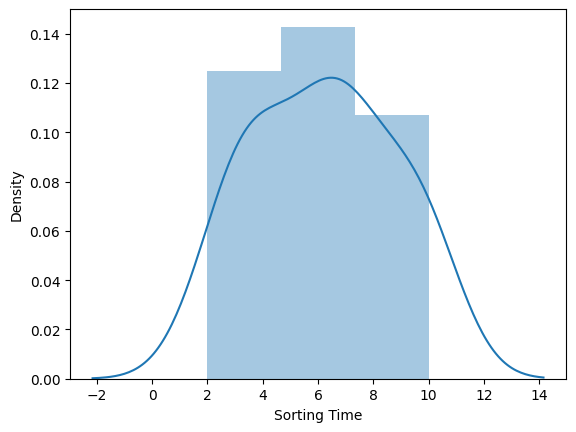

In [24]:
sns.distplot(dataset['Sorting Time'])


Feature Engineering
****

In [25]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Correlation Analysis


In [26]:
dataset.corr()


,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

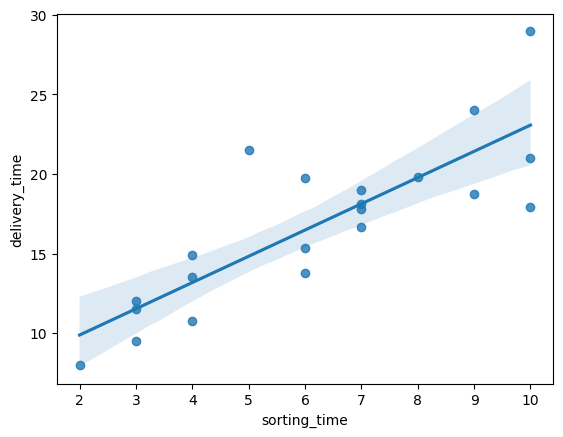

In [27]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])


Model Building



In [28]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()


**Getting important parameters from model**


In [32]:
# Coefficients Bo and B1
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)



Intercept, Bo:  6.5827339719970555
Sorting Time, B1:  1.649019896831246
tvalue:  Intercept       3.823349
sorting_time    6.387447
dtype: float64
pvalue:  Intercept       0.001147
sorting_time    0.000004
dtype: float64
R2:  0.6822714748417231
R2_Adj:  0.6655489208860244


Checking predictions of Model by equation

From the result Bo = 6.582734 and B1 = 1.649020, so our linear regression equation will become Y = Bo + B1X

Y = 6.582734 + 1.649020*X


In [61]:
predicted_time = model.predict(dataset.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : dataset.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df


,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


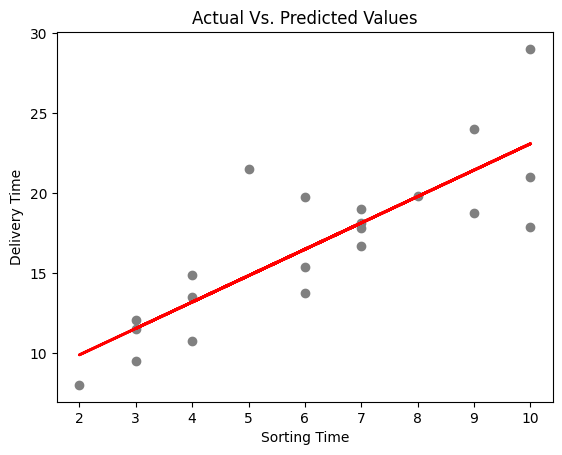

In [39]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset.sorting_time, dataset.delivery_time,  color='gray')
plt.plot(dataset.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


**Calculating Errors**


In [63]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(dataset.delivery_time, predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(dataset.delivery_time, predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dataset.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(dataset.delivery_time, predicted_time))


Mean Absolute Error: 2.085740955188266
Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654
R^2 Score :           0.6822714748417231


**Checking Normality of Residuals Using the Anderson-Darling test for normal distribution**


p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


<ipython-input-64-c667ead30d9e>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


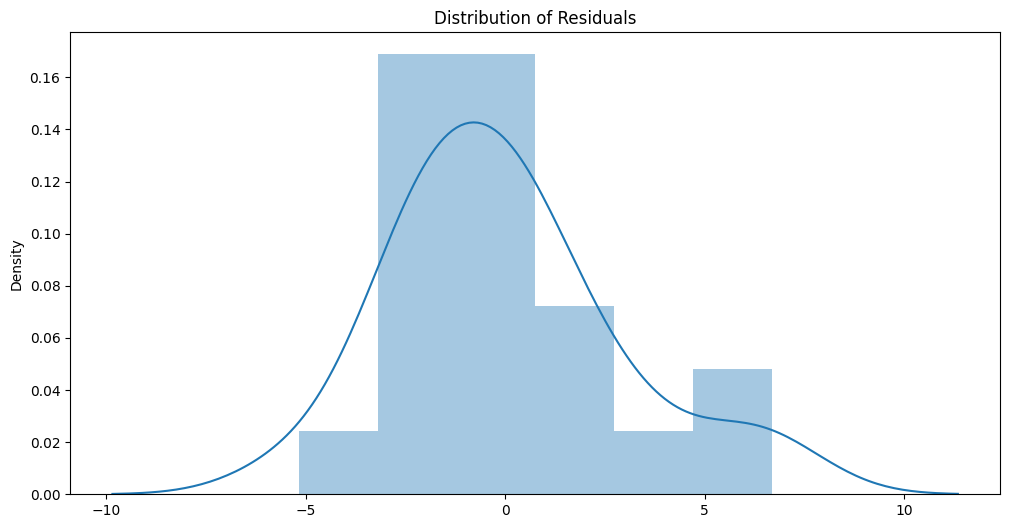

In [64]:
from statsmodels.stats.diagnostic import normal_ad
residuals = dataset.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()


In [65]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        17:09:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Building model with Logarithmic Transformation**


**Y = a + b * log(x)**


In [41]:
# Preparing data for model building
data1 = pd.DataFrame.copy(dataset)
data1['log_sorting_time'] = np.log(data1.sorting_time)
data1.head()


,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [42]:
# Building model
log_model = smf.ols('delivery_time ~ log_sorting_time', data = data1).fit()


**Getting important parameters from model**


In [43]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)


Intercept, Bo:  1.1596835115465758
Sorting Time, B1:  9.043413458205773
tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
R2:  0.6954434611324223
R2_Adj:  0.6794141696130761


**Checking predictions of Model by equation**

**From the result Bo = 1.1596835115465813 and B1 = 9**
**043413458205762, so our linear regression equation will become** **Y = Bo + B1*log(X)**
**Y = 1.1596835115465813 + 9.043413458205762*log(X)**


In [44]:
predicted_time = log_model.predict(data1.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df


,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


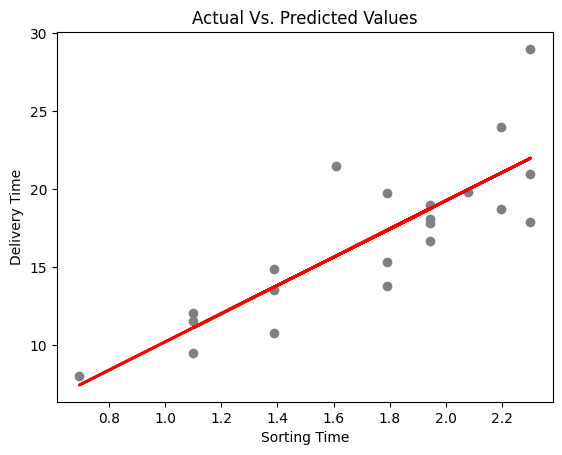

In [45]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.log_sorting_time, data1.delivery_time,  color='gray')
plt.plot(data1.log_sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


**Calculating Errors**


In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.delivery_time, predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(data1.delivery_time, predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.delivery_time, predicted_time))


Mean Absolute Error: 2.085740955188266
Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654
R^2 Score :           0.6822714748417231


**Checking Normality of Residuals Using the Anderson-Darling test for normal distribution**


p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


<ipython-input-67-6784cc814087>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


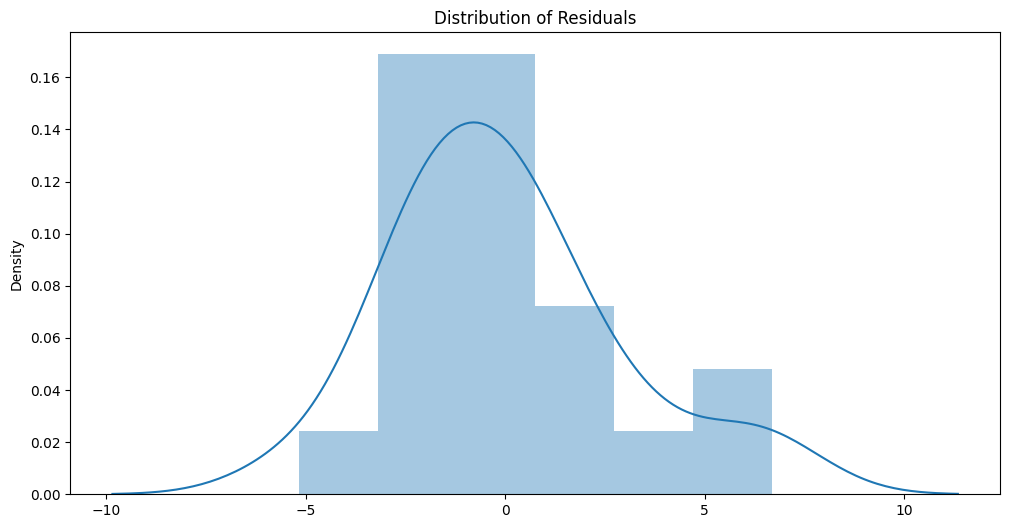

In [67]:
residuals = data1.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()


In [68]:
log_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.64e-06
Time:                        17:11:53   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Building model with exponential transformation**

**log(Y) =α + βX + ε**


In [46]:
# preparing data to build exponential model
data1['log_delivery_time'] = np.log(data1.delivery_time)
data1.head()


,delivery_time,sorting_time,log_sorting_time,log_delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [47]:
# Building model
exp_model = smf.ols('log_delivery_time ~ sorting_time', data = data1).fit()


**Getting important parameters from mode**


In [48]:
# Coefficients Bo and B1
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)


Intercept, Bo:  2.121371854893524
Sorting Time, B1:  0.10555159794344435
tvalue:  Intercept       20.601357
sorting_time     6.836088
dtype: float64
pvalue:  Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64
R2:  0.7109478980584187
R2_Adj:  0.6957346295351776


**Checking predictions of Model by equation**

**From the result Bo = 2.121371854893523 and B1 = 0** **1055515979434444, so our linear regression equation will** **become log(Y) = Bo + B1X + e**

**log(Y) = 2.121371854893523 + 0.1055515979434444*X + e**


In [49]:
predicted_time = exp_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.log_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df


,Delivery_Time_Actual,Delivery_Time_Predicted
0,3.044522,3.176888
1,2.602690,2.543578
2,2.983153,2.754681
3,3.178054,3.071336
4,3.367296,3.176888
5,2.731115,2.754681
6,2.944439,2.860233
7,2.251292,2.438027
8,2.884801,3.176888
9,2.931194,3.071336


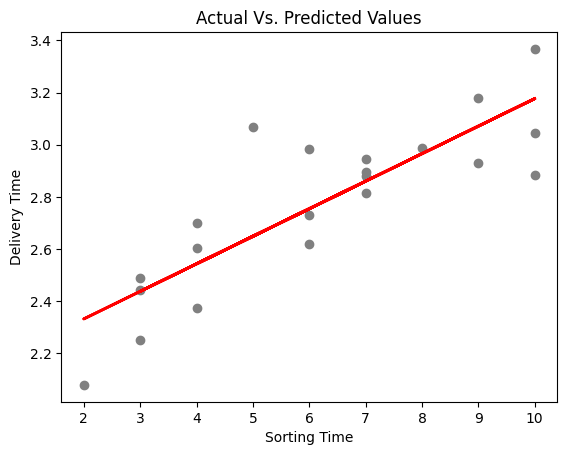

In [50]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.sorting_time, data1.log_delivery_time,  color='gray')
plt.plot(data1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


**Calculating Errors**


In [57]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.delivery_time, predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(data1.delivery_time, predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.delivery_time, predicted_time))


Mean Absolute Error: 12.739071991800168
Mean Squared Error: 182.88096713658425
Root Mean Squared Error: 13.523348961576945
R^2 Score :           -6.4559447040691404


**Checking Normality of Residuals Using the Anderson-Darling test for normal distribution**


p-value from the test: below 0.05 generally means non-normal: 0.9512129873060555
Residuals are normally distributed


<ipython-input-59-6784cc814087>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


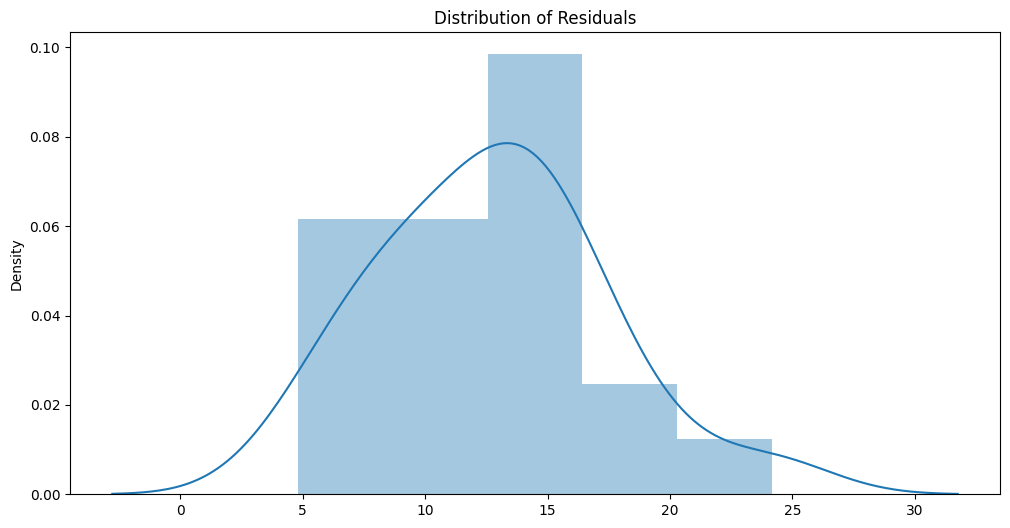

In [59]:
residuals = data1.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()


In [69]:
exp_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.59e-06
Time:                        17:14:34   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Building model with square root transformation¶**

**√Y = a + b * X + e**



In [51]:
# preparing data to build model
data1['sqrt_delivery_time'] = np.sqrt(data1.delivery_time)
data1.head()


,delivery_time,sorting_time,log_sorting_time,log_delivery_time,sqrt_delivery_time
0,21.00,10,2.302585,3.044522,4.582576
1,13.50,4,1.386294,2.602690,3.674235
2,19.75,6,1.791759,2.983153,4.444097
3,24.00,9,2.197225,3.178054,4.898979
4,29.00,10,2.302585,3.367296,5.385165


In [52]:
# Building model
sqrt_model = smf.ols('sqrt_delivery_time ~ sorting_time', data = data1).fit()


**Getting important parameters from mode**


In [53]:
# Coefficients Bo and B1
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)


Intercept, Bo:  2.772731039345034
Sorting Time, B1:  0.20663181804577496
tvalue:  Intercept       13.527452
sorting_time     6.723095
dtype: float64
pvalue:  Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64
R2:  0.704049871541756
R2_Adj:  0.6884735489913221


**Checking predictions of Model by equation**

**From the result Bo = 2.7727310393450324 and B1 = 0.** **20663181804577496, so our linear regression equation will** **become √Y = Bo + B1X + e**

**√Y = 2.7727310393450324 + 0.20663181804577496*X + e**


In [54]:
predicted_time = sqrt_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.sqrt_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df


,Delivery_Time_Actual,Delivery_Time_Predicted
0,4.582576,4.839049
1,3.674235,3.599258
2,4.444097,4.012522
3,4.898979,4.632417
4,5.385165,4.839049
5,3.917908,4.012522
6,4.358899,4.219154
7,3.082207,3.392626
8,4.230839,4.839049
9,4.330127,4.632417


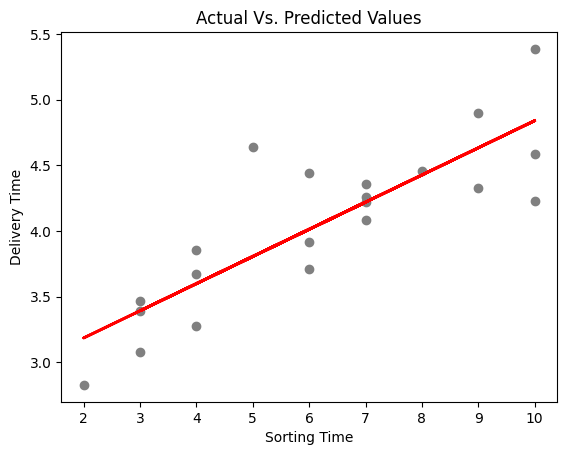

In [55]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.sorting_time, data1.sqrt_delivery_time,  color='gray')
plt.plot(data1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


**Calculating Errors**


In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_delivery_time, predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_delivery_time, predicted_time))


Mean Absolute Error: 12.739071991800177
Mean Squared Error: 175.1981094121736
Root Mean Squared Error: 13.236242269321517
R^2 Score :           -468.426055406161


In [71]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_delivery_time)**2, 'Predicted': (predicted_time)**2})
pred_df


,Actual,Predicted
0,21.00,532.360234
1,13.50,173.681127
2,19.75,271.486696
3,24.00,458.984050
4,29.00,532.360234
5,15.35,271.486696
6,19.00,328.547281
7,9.50,132.936142
8,17.90,532.360234
9,18.75,458.984050


**Checking Normality of Residuals Using the Anderson-Darling test for normal distribution**

p-value from the test: below 0.05 generally means non-normal: 0.4031520521141255
Residuals are normally distributed


<ipython-input-72-fe69afcf883b>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


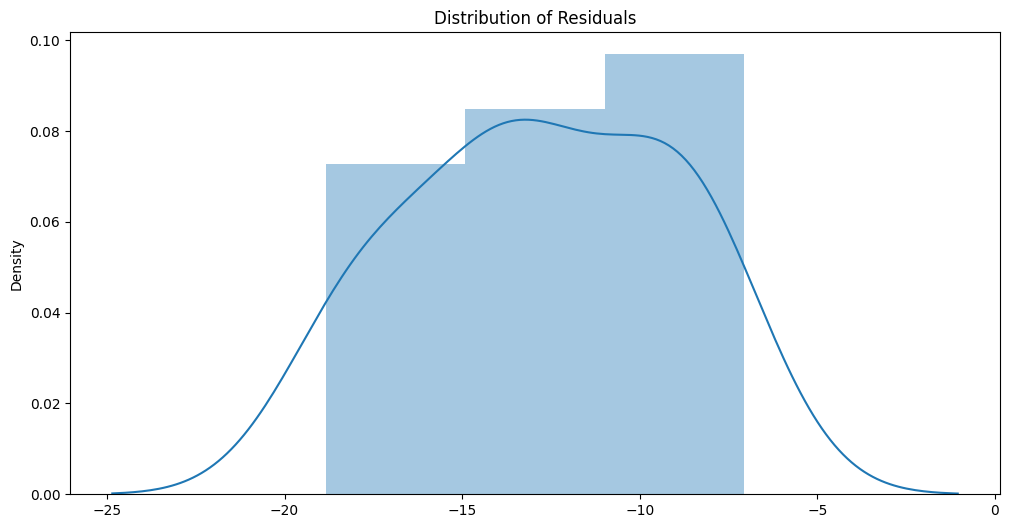

In [72]:
residuals = data1.sqrt_delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()


In [73]:
sqrt_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.00e-06
Time:                        17:16:57   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion    
We have found that while transforming the model,we got various values for MAE, RMSE, MSE and R 2 Values.                       
Summery of the following Models                                                                  
Simple linear Regression Model  
Mean Absolute Error: 2.0857409551882653                  
Mean Squared Error: 7.793311548584063                           
Root Mean Squared Error: 2.7916503270617654             
R^2 Score : 0.6822714748417231               
Logrithm Transformation Model                                      
Mean Absolute Error: 2.0473757067928995                       
Mean Squared Error: 7.470226320948425                           
Root Mean Squared Error: 2.733171476682066                      
R^2 Score : 0.6954434611324223                                  
Exponential Transformation Model                                   
Mean Absolute Error: 0.1310730556090564                          
Mean Squared Error: 0.027876563581789988                          
Root Mean Squared Error: 0.16696276106302863                      
R^2 Score : 0.7109478980584187                          
Square-root Transformation Model                                  
Mean Absolute Error: 0.2562892192762892                          
Mean Squared Error: 0.11045382417324966                         
Root Mean Squared Error: 0.33234594050965877                          
R^2 Score : 0.704049871541756¶**
